In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

In [4]:
def get_views_coord():

    """Get views data with coords"""

    path = '/home/polichinel/Documents/Articles/conflict_prediction/data/ViEWS/'
    file_name = 'ViEWS_coord.pkl'

    file_path = os.path.join(path, file_name)
    views_coord = pd.read_pickle(file_path)

    return(views_coord)

df = get_views_coord()

In [5]:
print(f"years from {df['year'].min()} to {df['year'].min()}. Shape: {df.shape}")

years from 1989 to 1989. Shape: (3843720, 18)


In [6]:
df.columns

Index(['id', 'pg_id', 'month_id', 'year', 'month', 'gwcode', 'ged_dummy_sb',
       'ged_count_sb', 'ged_best_sb', 'ged_dummy_ns', 'ged_count_ns',
       'ged_best_ns', 'ged_dummy_os', 'ged_count_os', 'ged_best_os', 'xcoord',
       'ycoord', 'ged_best'],
      dtype='object')

count    10677.000000
mean         0.999251
std          5.763137
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        187.000000
Name: ged_total_events_sb, dtype: float64


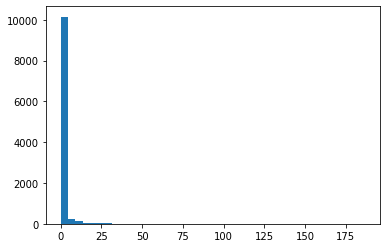

number of cells in sample givne C=5: 453


In [89]:
def get_conflict_gids(C=5, info = True):

    """Get gids (pg_ids) with conflicst. 
    C = the number of total monthly conflicts events experienced through the time line. 
    Defuelt C =5.
    If info = True describtion and as histogram of total_events will be printed/showed"""

    df_sb_total_events = df.groupby(['pg_id']).sum()['ged_dummy_sb'].reset_index().rename(columns = {'ged_dummy_sb':'ged_total_events_sb'})
    
    if info == True:
        
        print(df_sb_total_events['ged_total_events_sb'].describe())
        plt.hist(df_sb_total_events['ged_total_events_sb'], bins = 42)
        plt.show()

    conflict_gids = df_sb_total_events[df_sb_total_events['ged_total_events_sb'] > C]['pg_id']
    print(f'number of cells in sample givne C={C}: {conflict_gids.shape[0]}')

    return(conflict_gids)

conflict_gids = get_conflict_gids(C = 5)

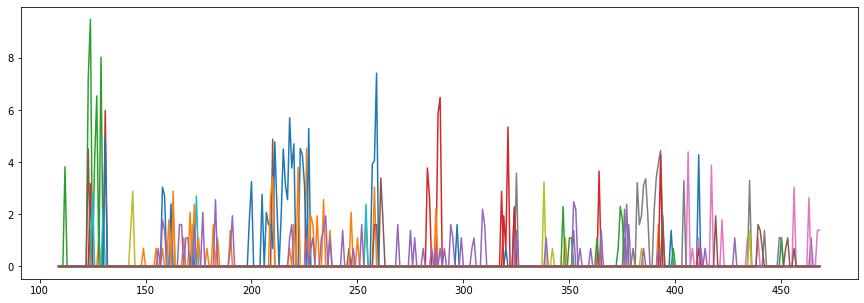

In [90]:
plt.figure(figsize= [15,5])

random_gids = conflict_gids.sample(16, random_state = 42)
df_sorted = df.sort_values('month_id')

random_sub = df_sorted[df_sorted['pg_id'].isin(random_gids)] 

for i in random_gids:
    
    x = random_sub[random_sub['pg_id'] == i]['month_id']
    y = np.log(random_sub[random_sub['pg_id'] == i]['ged_best_sb'] +1)

    plt.plot(x, y)
plt.show()